In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import morton

In [126]:
df = pd.read_csv('data/2022-09-21_LaneChanges/Extracted_CleanLaneChanges/All_LCs/lane_change_30.csv', sep=';')

# remove unrelevant timestamp columns (except 'ts')
df.drop(columns=['sent.seconds','sent.microseconds','received.seconds','received.microseconds','sampleTimeStamp.seconds','sampleTimeStamp.microseconds',
                             'sent.seconds.1','sent.microseconds.1','received.seconds.1','received.microseconds.1','sampleTimeStamp.seconds.1','sampleTimeStamp.microseconds.1',
                             'IMULgtAcceleration', 'IMUVerAcceleration']
                             , axis=1, inplace=True)


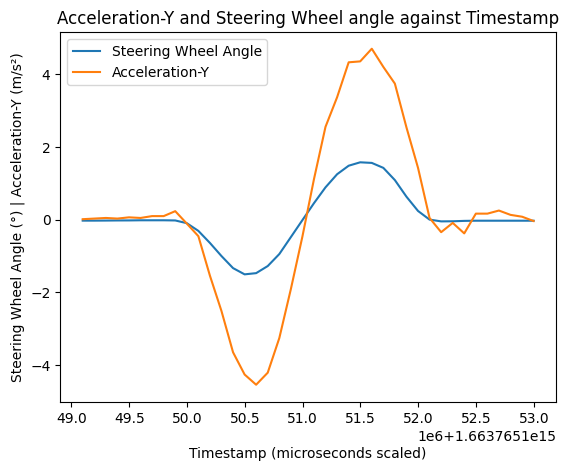

In [129]:
ax = df.plot(x='ts', y=['SteeringWhlAngle', 'IMULatAcceleration'])
ax.set_xlabel('\nTimestamp (microseconds scaled)')
ax.set_ylabel('Steering Wheel Angle (°) | Acceleration-Y (m/s\u00B2)')
ax.set_title('Acceleration-Y and Steering Wheel angle against Timestamp')
ax.legend(['Steering Wheel Angle', 'Acceleration-Y'])

<Axes: title={'center': 'Acceleration-Y and Steering angle against Timestamp'}, xlabel='\nTimestamp (Microseconds scaled)', ylabel='Steering Wheel Angle (°) | Acceleration-Y (m/s²)'>

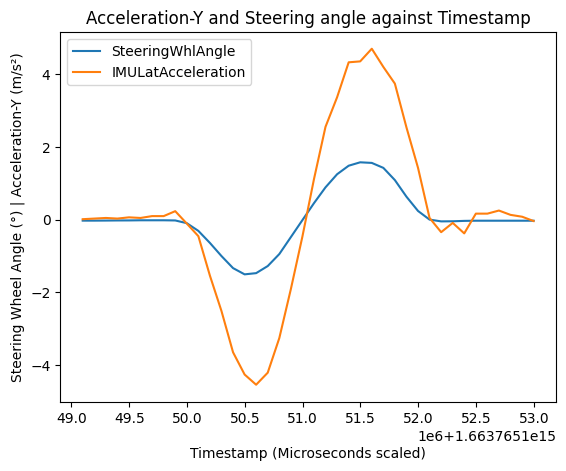

In [ ]:
df.plot(x='ts', y=['SteeringWhlAngle', 'IMULatAcceleration'], title='Acceleration-Y and Steering angle against Timestamp', xlabel='\nTimestamp (Microseconds scaled)', ylabel='Steering Wheel Angle (°) | Acceleration-Y (m/s\u00B2)')

In [ ]:
OFFSET = 10
FACTOR_MULTIPLY = 10000

df['IMULatAcceleration']=df['IMULatAcceleration'].add(OFFSET)
df['SteeringWhlAngle']=df['SteeringWhlAngle'].add(OFFSET)

df['IMULatAcceleration'] = df.apply(lambda x: int(x['IMULatAcceleration']*FACTOR_MULTIPLY) , axis=1)
df['SteeringWhlAngle'] = df.apply(lambda x: int(x['SteeringWhlAngle']*FACTOR_MULTIPLY) , axis=1)

In [ ]:
m = morton.Morton(dimensions=2, bits=18)

def set_value(row):
    return m.pack(int(row['IMULatAcceleration']), int(row['SteeringWhlAngle']))

df['morton'] = df.apply(set_value, axis=1)

### Manipulation

In [ ]:
# declare df_manipulated where we will store a copy of original df, but with manipulations 
# '.copy()' is necessary otherwise the manipulation affects the original
df_manipulated = df.copy()

# MANIPULATION OFFSET TESTS
# 10^10 (1 with ten zeros)
#manipulation_offset = 10000000000
#manipulation_offset = 123456789
# 5 with nine zeros
#manipulation_offset = 5000000000
# powers of 2
#manipulation_offset = 65536*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2
# prime number
#manipulation_offset = 65537*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2*2
manipulation_offset = 50000000
#manipulation_offset = 0

# LC30 outliers are located at index 22:27 (for loop needs +1 for the top value)
# LC31 outliers are located at index 25:30 (for loop needs +1 for the top value)
# iterate through outliers
for i in range(22, 28):
    # reduce outlier value by subtracting manipulation_offset
    df_manipulated.loc[i, ['morton']] = df.loc[i, ['morton']] + manipulation_offset
    # extract manipulated values of IMULatAcceleration and SteeringWhlAngle (for current outlier)
    values_manipulated = m.unpack(int(df_manipulated.loc[i,['morton']]))
    
    # replace IMULatAcceleration and SteeringWhlAngle with unpacked manipulated morton values
    df_manipulated.loc[i, ['IMULatAcceleration']] = values_manipulated[0]
    df_manipulated.loc[i, ['SteeringWhlAngle']] = values_manipulated[1]
    
    # revert IMULatAcceleration and SteeringWhlAngle to before constants
    #df_manipulated.loc[i, ['IMULatAcceleration']] = (values_manipulated[0] / FACTOR_MULTIPLY) - OFFSET
    #df_manipulated.loc[i, ['SteeringWhlAngle']] = (values_manipulated[1] / FACTOR_MULTIPLY) - OFFSET


df_manipulated.iloc[22:34]

#values_manipulated = m.unpack(df.loc[i,['morton']])
# revert to before constants
#values[0] = (values[0] / FACTOR_MULTIPLY) - OFFSET # lat acceleration
#values[1] = (values[1] / FACTOR_MULTIPLY) - OFFSET # steering angle

#test = m.unpack(17179869183)
#test[0] = (test[0] / FACTOR_MULTIPLY) - OFFSET # lat acceleration
#test[1] = (test[1] / FACTOR_MULTIPLY) - OFFSET # lat acceleration
#test

,IMULatAcceleration,ts,SteeringWhlAngle,morton
22,145740,1663765151298401,108052,28142277232
23,146657,1663765151398403,118844,28576865953
24,132464,1663765151497913,123734,28590159656
25,134413,1663765151598306,123456,28594217041
26,154470,1663765151698396,101736,28217654420
27,141176,1663765151797937,112201,28156179906
28,125330,1663765151898335,106269,16490644390
29,114195,1663765151998403,102343,16206700847
30,100425,1663765152097961,99970,16112980041
31,96515,1663765152198315,99482,15391097485


### Plots

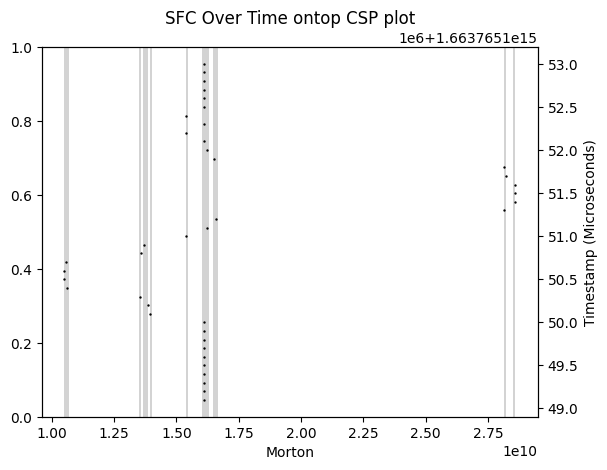

In [ ]:
fig, ax = plt.subplots()
ax.hist(df_manipulated['morton'], bins=200, color='lightgray')
ax.set_ylim([0,1])
ax2 = ax.twinx()
ax2.scatter(x=df_manipulated['morton'],y=df_manipulated['ts'], c='black', s=0.5)
ax.set_xlabel('Morton')
ax2.set_title("SFC Over Time ontop CSP plot")
ax2.set_ylabel('Timestamp (Microseconds)')
plt.show()

In [ ]:
# whole bell shape
#df_manipulated = df_manipulated.iloc[25:31]
# just growth
#df_manipulated = df_manipulated.iloc[25:28]
# other area
#df_manipulated = df_manipulated.iloc[30:50]
# lc 30 outliers
#df_manipulated = df_manipulated.iloc[22:28]
#df_manipulated


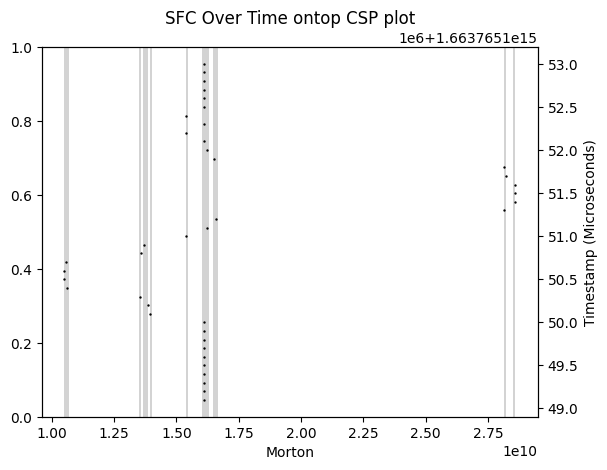

In [ ]:
fig, ax = plt.subplots()
ax.hist(df_manipulated['morton'], bins=200, color='lightgray')
ax.set_ylim([0,1])
ax2 = ax.twinx()
ax2.scatter(x=df_manipulated['morton'],y=df_manipulated['ts'], c='black', s=0.5)
ax.set_xlabel('Morton')
ax2.set_title("SFC Over Time ontop CSP plot")
ax2.set_ylabel('Timestamp (Microseconds)')
plt.show()

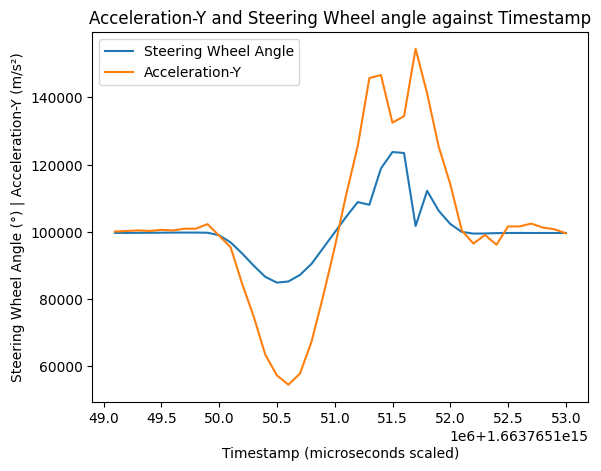

In [130]:
ax = df_manipulated.plot(x='ts', y=['SteeringWhlAngle', 'IMULatAcceleration'])
ax.set_xlabel('\nTimestamp (microseconds scaled)')
ax.set_ylabel('Steering Wheel Angle (°) | Acceleration-Y (m/s\u00B2)')
ax.set_title('Acceleration-Y and Steering Wheel angle against Timestamp')
ax.legend(['Steering Wheel Angle', 'Acceleration-Y'])